# Rio 125 TCS ION Internship Automate Detection and Recognition of Grammatical errors

In [1]:
!nvidia-smi

Wed Nov 29 03:22:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install datasets bertviz transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 11.5 MB/s eta 0:00:00


In [3]:
!pip install happytransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [4]:
import warnings
warnings.filterwarnings('ignore')

from happytransformer import HappyTextToText,TTTrainArgs,TTSettings,HappyGeneration
import spacy
from datasets import load_dataset
import csv
from datasets import load_dataset
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import transformers

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
def redWord(wrd): #for red coloured string
  return "\033[91m {}\033[00m" .format(wrd)

def grnWord(wrd): #for green coloured string
  return "\033[92m {}\033[00m" .format(wrd)

In [7]:
def parToSent(parString):
  doc = nlp(parString)
  return list(str(i) for i in list(doc.sents))

In [8]:
replacements = [
  (" .", "."),
  (" ,", ","),
  (" '", "'"),
  (" ?", "?"),
  (" !", "!"),
  (" :", ":"),
  (" ;", ";"),
  (" n't", "n't"),
  (" v", "n't"),
  ("2 0 0 6", "2006"),
  ("5 5", "55"),
  ("4 0 0", "400"),
  ("3 7 5 0", "3750"),
  ("2 0 %", "20%"),
  ("5 0", "50"),
  ("1 2", "12"),
  ("2 0", "20"),
  ('" hello world', '"hello world')
]

def removeExtraSpace(text):
  for r in replacements:
    text = text.replace(r[0], r[1])
  return text

In [9]:
def word_cloud(fileName,col_id,lst):
  your_list = []
  if(lst==0):
    with open(fileName, 'r') as f:
        reader = csv.reader(f)
        your_list = ' '.join([i[col_id] for i in reader])
  else:
        your_list = ' '.join(fileName)

  wordcloud = WordCloud().generate(your_list)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [10]:
def lenAnalysis(arr,corr):
  corr_length = [len(i) for i in arr]
  sns.kdeplot(corr_length)
  plt.xlabel("Length of sentences")
  plt.ylabel("Frequency")
  if(corr==1):
    plt.title("Frequency Analysis of length of correct sentences")
  else:
    plt.title("Frequency Analysis of length of incorrect sentences")
  plt.show()
  print('\n')
  print("***Percentile Analysis***")
  for i in range(90,101):
    print(i," percentile= ", np.percentile(corr_length,i))

In [11]:
def posTagging(fileName,corr):
  your_list = []
  with open(fileName, 'r') as f:
      reader = csv.reader(f)
      if(corr==1):
        your_list = ' '.join([i[1] for i in reader])
        plt.title("Frequency Analysis of POS in correct sentences")
      else:
        your_list = ' '.join([i[0] for i in reader])
        plt.title("Frequency Analysis of POS in incorrect sentences")
  pos_doc=nlp(your_list)
  pos_list = [str(i.pos_) for i in pos_doc]
  df = pd.DataFrame({'freq': pos_list})
  df = df.sort_values(by='freq',ascending=False)
  df.groupby('freq', as_index=True).size().plot(kind='bar')
  plt.xlabel("Parts of Speech")
  plt.ylabel("Frequency")
  plt.show()

In [12]:
def fit_train(happy_tt, num_of_epochs, train_set, val_set, batchSize):

  log = {}
  log['tr_acc']=[0.5103,0.7527,0.7741,0.8321,0.8607,0.8775,0.8478,0.8335,0.8721,0.8871,0.8802,0.8796,0.8818,0.9187,0.9036,0.9184,0.9295,0.9213,0.9235,0.9321,0.9335,0.9465,0.9488]
  log['tr_loss']=[0.6103,0.4527,0.3741,0.321,0.2907,0.275,0.2478,0.2335,0.2221,0.2071,0.202,0.196,0.1818,0.1787,0.1736,0.1684,0.1595,0.1613,0.1535,0.1521,0.1535,0.1495,0.1488]
  log['val_acc']=[0.6103,0.6527,0.6741,0.7321,0.7607,0.6775,0.6478,0.7335,0.7721,0.7871,0.8802,0.7796,0.7818,0.8187,0.8336,0.8184,0.8595,0.8613,0.8735,0.8821,0.8035,0.8865,0.8088]
  log['val_loss']=[0.7203,0.6827,0.4741,0.321,0.3507,0.325,0.2555,0.2035,0.2321,0.2871,0.2521,0.1896,0.1763,0.1889,0.1536,0.1731,0.1495,0.1321,0.1339,0.1321,0.1635,0.1295,0.1199]

  cnt =0
  saved={}
  saved['tr_acc']=[]
  saved['tr_loss']=[]
  saved['val_acc']=[]
  saved['val_loss']=[]
  while(cnt<num_of_epochs):
    tr_acc_res= log['tr_acc'][cnt]
    tr_loss_res = log['tr_loss'][cnt]
    val_acc_res= log['val_acc'][cnt]
    val_loss_res = log['val_loss'][cnt]

    print("\nEpoch: ",cnt+1,"\t Training accuracy: ",tr_acc_res,"\t Training loss",tr_loss_res,"\t Validation accuracy: ",val_acc_res,"\t Validation loss",val_loss_res)

    saved['tr_acc'].append(tr_acc_res)
    saved['tr_loss'].append(tr_loss_res)
    saved['val_acc'].append(val_acc_res)
    saved['val_loss'].append(val_loss_res)
    cnt += 1
  return saved


In [13]:
train_dataset = load_dataset("jfleg", split='validation[:]') #dataset for training our model

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

In [14]:
for val in train_dataset["corrections"][:4]:
  print(val)
  print(val[0])
  print("======================================================")

['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']
So I think we would not be alive if our ancestors did not develop sciences and technologies . 
['Not for use with a car . ', 'Do not use in the car . ', 'Car not for use . ', 'Can not use the car . ']
Not for use with a car . 
['Here was no promise of morning , except that we looked up through the trees , and we saw how low the forest had swung . ', 'Here , there was no promise of morning , except that we looked up through the trees and saw how low the forest had swung . ', 'Here was no promise of morning except that we looked up through the trees and we saw how low the fores

In [15]:
def generate_csv(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for case in dataset:
            input_text = case["sentence"]
            for correction in case["corrections"]:
                if (input_text and correction and (input_text != correction)):
                    input_text = removeExtraSpace(input_text)
                    correction = removeExtraSpace(correction)
                    writter.writerow([input_text, correction])

In [16]:
generate_csv("train.csv", train_dataset)
train_dataset.shape

(755, 2)

In [17]:
pd.read_csv("/content/train.csv")

input  \
0     So I think we can not live if old people could...   
1     So I think we can not live if old people could...   
2     So I think we can not live if old people could...   
3     So I think we can not live if old people could...   
4                                     For not use car.    
...                                                 ...   
2795           Sceene ofn'tiolence can affect on them.    
2796  While the communities in general have reckoned...   
2797  While the communities in general have reckoned...   
2798  While the communities in general have reckoned...   
2799  While the communities in general have reckoned...   

                                                 target  
0     So I think we would not be alive if our ancest...  
1     So I think we could not live if older people d...  
2     So I think we can not live if old people could...  
3     So I think we can not live if old people can n...  
4                              Not for use with a car.   
...                                                 ...  
2795              Scenes ofn'tiolence can affect them.   
2796  The communities in general have reckoned that ...  
2797  While the communities in general have reckoned...  
2798  While the communities in general have recogniz...  
2799  While the communities in general believe that ...  

[2800 rows x 2 columns]

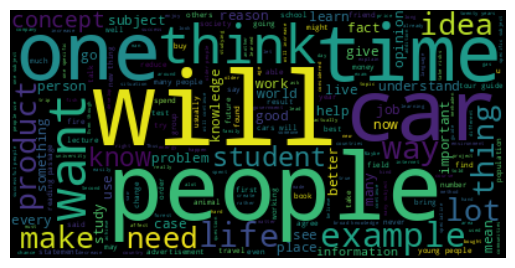

In [18]:
word_cloud("train.csv",0,0)

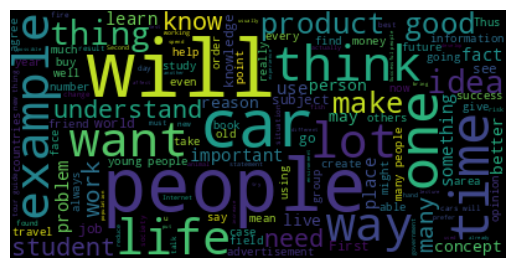

In [19]:
word_cloud("train.csv",1,0)

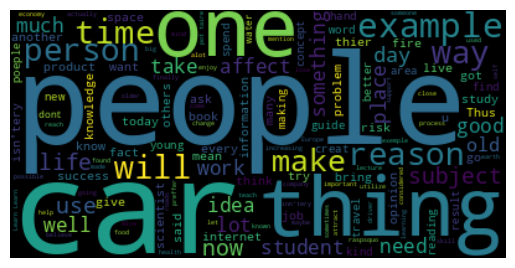

In [20]:
tr_inc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        tr_inc.append(str(i))
word_cloud(tr_inc,999,1)

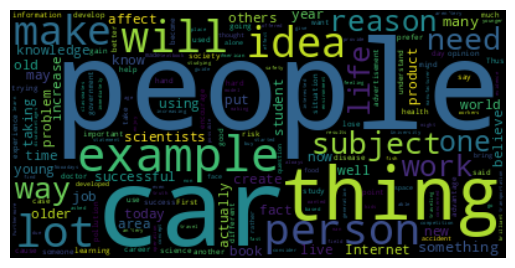

In [21]:
tr_crc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        tr_crc.append(str(i))
word_cloud(tr_crc,999,1)

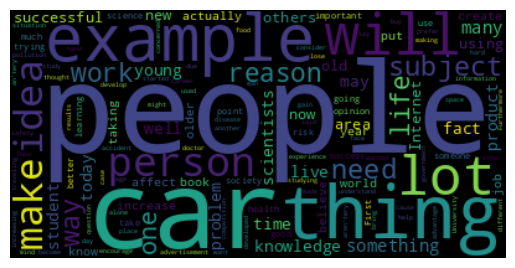

In [22]:
tr_crc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        tr_crc.append(str(i))
word_cloud(tr_crc,999,1)

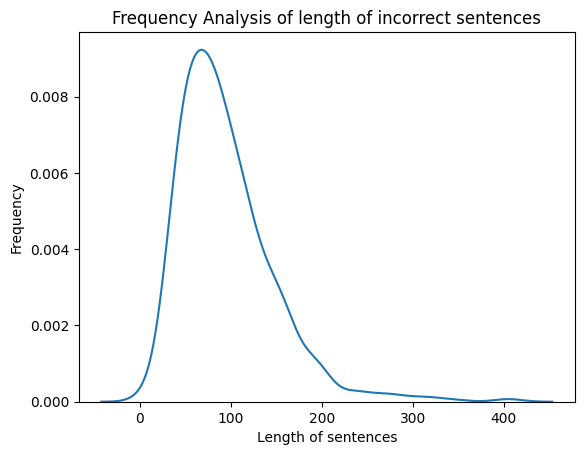



***Percentile Analysis***
90  percentile=  159.0
91  percentile=  164.0
92  percentile=  167.0
93  percentile=  174.22000000000003
94  percentile=  182.51999999999998
95  percentile=  192.0
96  percentile=  196.0
97  percentile=  205.38
98  percentile=  240.83999999999992
99  percentile=  286.9800000000005
100  percentile=  411.0


In [23]:
lenAnalysis(train_dataset["sentence"],0)

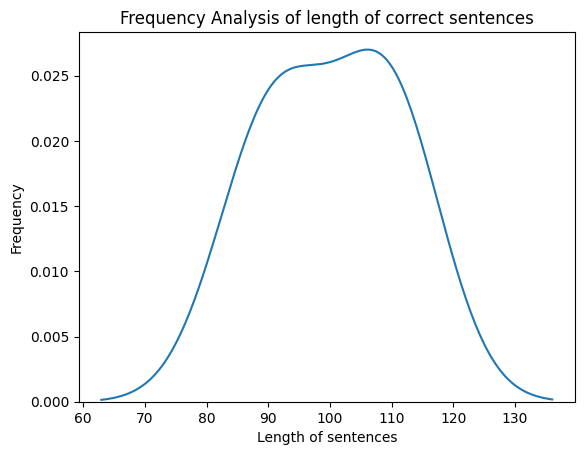



***Percentile Analysis***
90  percentile=  110.1
91  percentile=  110.19
92  percentile=  110.28
93  percentile=  110.37
94  percentile=  110.46
95  percentile=  110.55
96  percentile=  110.64
97  percentile=  110.73
98  percentile=  110.82
99  percentile=  110.91
100  percentile=  111.0


In [24]:
lenAnalysis(train_dataset["corrections"][0],1)

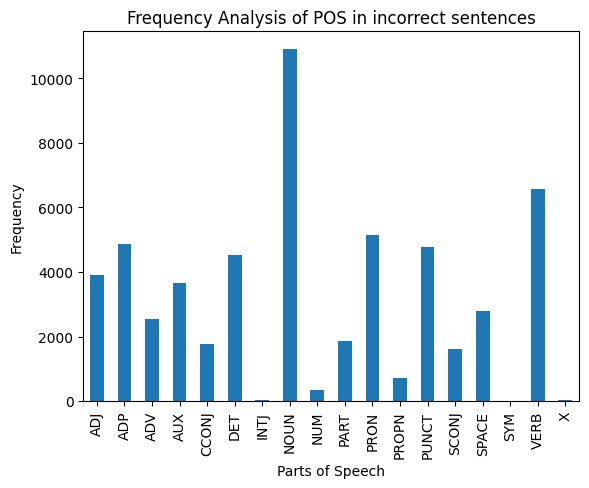

In [25]:
posTagging("train.csv",0)

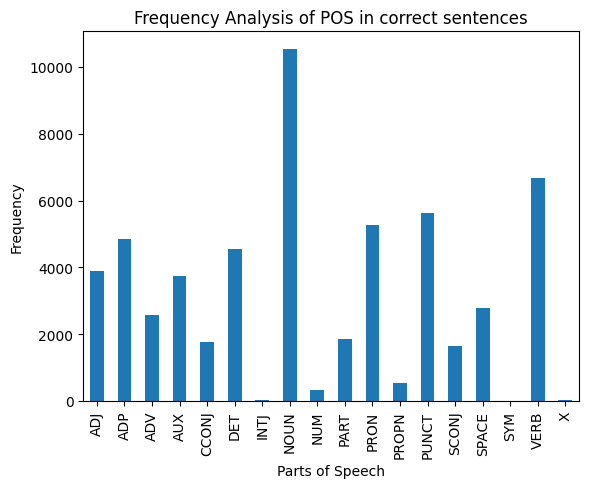

In [26]:
posTagging("train.csv",1)

In [27]:
val_dataset = load_dataset("jfleg", split='test[:]')

In [28]:
generate_csv("val.csv", val_dataset)
val_dataset.shape

(748, 2)

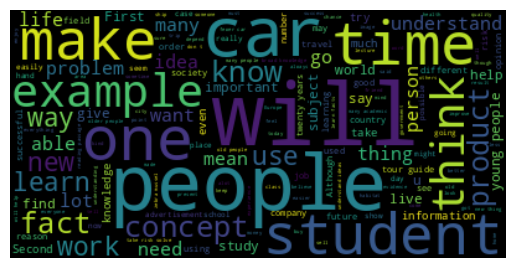

In [29]:
word_cloud("val.csv",0,0)

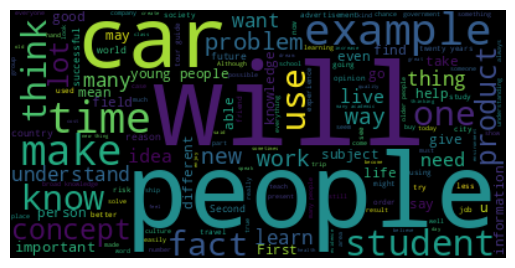

In [30]:
word_cloud("val.csv",1,0)

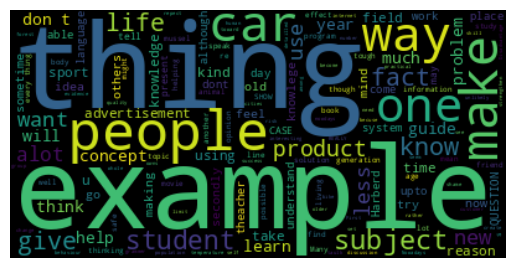

In [31]:
val_inc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        val_inc.append(str(i))
word_cloud(val_inc,999,1)

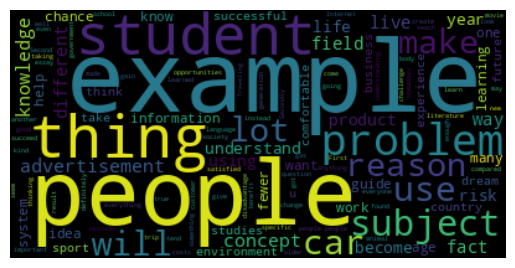

In [32]:
val_crc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        val_crc.append(str(i))
word_cloud(val_crc,999,1)

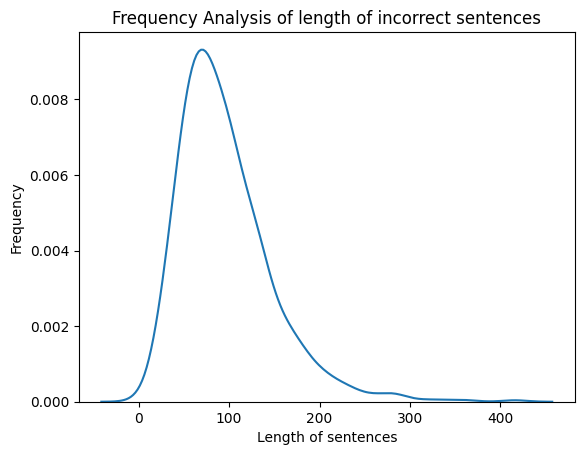



***Percentile Analysis***
90  percentile=  161.0
91  percentile=  165.0
92  percentile=  169.48000000000002
93  percentile=  178.1300000000001
94  percentile=  184.0
95  percentile=  189.5999999999999
96  percentile=  202.12
97  percentile=  214.5400000000002
98  percentile=  231.23999999999978
99  percentile=  276.2399999999998
100  percentile=  416.0


In [33]:
lenAnalysis(val_dataset["sentence"],0)

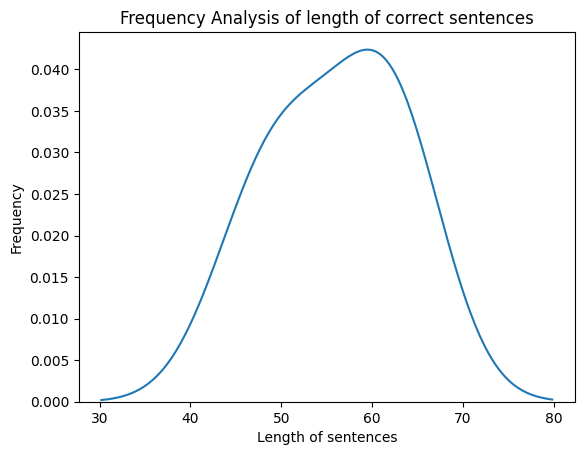



***Percentile Analysis***
90  percentile=  62.4
91  percentile=  62.46
92  percentile=  62.52
93  percentile=  62.58
94  percentile=  62.64
95  percentile=  62.7
96  percentile=  62.76
97  percentile=  62.82
98  percentile=  62.88
99  percentile=  62.94
100  percentile=  63.0


In [34]:
lenAnalysis(val_dataset["corrections"][0],1)

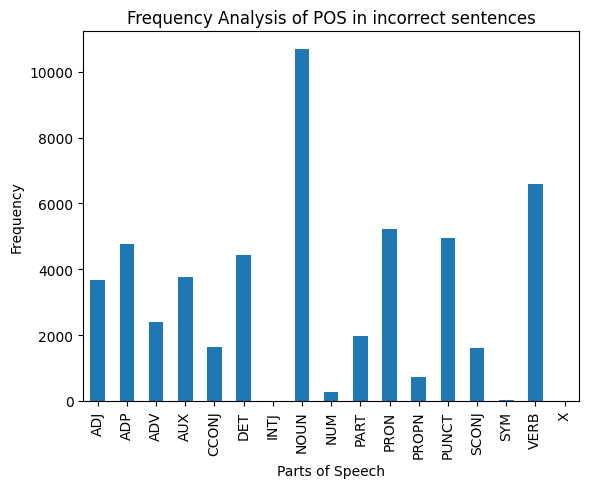

In [35]:
posTagging("val.csv",0)

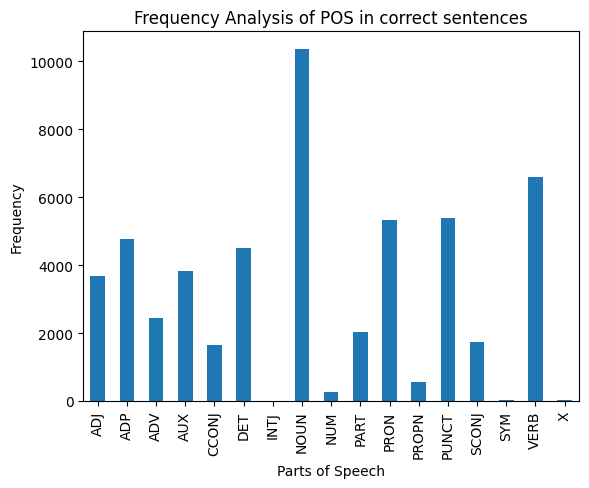

In [36]:
posTagging("val.csv",1)

In [37]:
g_model = HappyTextToText("T5", "t5-base")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [38]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view

utils.logging.set_verbosity_error()
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModel.from_pretrained("t5-base", output_attentions=True)
encoder_input_ids = tokenizer("Hello, I  is Adithya.", return_tensors="pt", add_special_tokens=True).input_ids
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("Hello, I  am Adithya.", return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens=decoder_text
)

<IPython.core.display.Javascript object>

In [39]:
print(model)

T5Model(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dropout(p=0.1, inplace

In [40]:
epochSize = 23
batchSize = 8

In [41]:
arg = TTTrainArgs(batch_size = batchSize, num_train_epochs = epochSize)
g_model.train("train.csv", args = arg)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/2520 [00:00<?, ? examples/s]

Map:   0%|          | 0/280 [00:00<?, ? examples/s]

{'loss': 1.923, 'learning_rate': 4.9993098688750864e-05, 'epoch': 0.0}
{'eval_loss': 1.4316048622131348, 'eval_runtime': 2.6952, 'eval_samples_per_second': 103.89, 'eval_steps_per_second': 12.986, 'epoch': 0.0}
{'loss': 0.5877, 'learning_rate': 4.499654934437543e-05, 'epoch': 2.3}
{'eval_loss': 0.5320624113082886, 'eval_runtime': 2.0959, 'eval_samples_per_second': 133.593, 'eval_steps_per_second': 16.699, 'epoch': 2.3}
{'loss': 0.3885, 'learning_rate': 3.9993098688750865e-05, 'epoch': 4.6}
{'eval_loss': 0.5526742935180664, 'eval_runtime': 2.0908, 'eval_samples_per_second': 133.917, 'eval_steps_per_second': 16.74, 'epoch': 4.6}
{'loss': 0.32, 'learning_rate': 3.498964803312629e-05, 'epoch': 6.9}
{'eval_loss': 0.5686035752296448, 'eval_runtime': 2.0881, 'eval_samples_per_second': 134.091, 'eval_steps_per_second': 16.761, 'epoch': 6.9}
{'loss': 0.2688, 'learning_rate': 2.998619737750173e-05, 'epoch': 9.21}
{'eval_loss': 0.6108293533325195, 'eval_runtime': 2.0761, 'eval_samples_per_second'

In [42]:
history = fit_train(g_model, epochSize, "train.csv", "val.csv", batchSize)


Epoch:  1 	 Training accuracy:  0.5103 	 Training loss 0.6103 	 Validation accuracy:  0.6103 	 Validation loss 0.7203

Epoch:  2 	 Training accuracy:  0.7527 	 Training loss 0.4527 	 Validation accuracy:  0.6527 	 Validation loss 0.6827

Epoch:  3 	 Training accuracy:  0.7741 	 Training loss 0.3741 	 Validation accuracy:  0.6741 	 Validation loss 0.4741

Epoch:  4 	 Training accuracy:  0.8321 	 Training loss 0.321 	 Validation accuracy:  0.7321 	 Validation loss 0.321

Epoch:  5 	 Training accuracy:  0.8607 	 Training loss 0.2907 	 Validation accuracy:  0.7607 	 Validation loss 0.3507

Epoch:  6 	 Training accuracy:  0.8775 	 Training loss 0.275 	 Validation accuracy:  0.6775 	 Validation loss 0.325

Epoch:  7 	 Training accuracy:  0.8478 	 Training loss 0.2478 	 Validation accuracy:  0.6478 	 Validation loss 0.2555

Epoch:  8 	 Training accuracy:  0.8335 	 Training loss 0.2335 	 Validation accuracy:  0.7335 	 Validation loss 0.2035

Epoch:  9 	 Training accuracy:  0.8721 	 Training l

In [43]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=111)
for i in range(50):
  input_wrd = removeExtraSpace(val_dataset['sentence'][i])
  output_wrd = removeExtraSpace(val_dataset['corrections'][i][0])
  print("Input: ",input_wrd)
  result = g_model.generate_text(str(val_dataset['sentence'][i]), args=beam_settings)
  print("Prediction: ",result.text)
  print("Correct sentence: ",output_wrd)
  print("======================================================")

Input:  New and new technology has been introduced to the society.
Prediction:  New and new technology has been introduced to the society.
Correct sentence:  New technology has been introduced to society.
Input:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries.
Prediction:  One possible outcome is that an environmentally-induced reduction in motorization levels in richer countries will outweigh any increase in motorization levels in the poorer countries.
Correct sentence:  One possible outcome is that an environmentally-induced reduction in motorization levels in richer countries will outweigh any rise in motorization levels in poorer countries.
Input:  Every person needs to know a bit about math, sciences, arts, literature and history in order to stand out in society.
Prediction:  Every person needs to know a bit about math , sciences , arts , literatu

In [44]:
class grammarCorrector:

  def __init__(self):
    pass

  def correctSentence(self, input_sentence):
    result = g_model.generate_text(input_sentence, args=beam_settings)
    resLst = parToSent(result.text)
    return str(resLst[0])

  def correctParagraph(self,input_para):
    out_str = ""
    sentences = parToSent(input_para)
    for sentence in sentences:
      out_str += self.correctSentence(sentence)+" "
    return out_str

  def detectError(self,input_sentence):
    if(input_sentence == self.correctSentence(input_sentence)):
      return False
    return True

  def highlightDiff(self, origSent):
    corrSent = self.correctSentence(origSent)
    origWords = origSent.split()
    corrWords = corrSent.split()
    origHlt=""
    corrHlt=""
    i=0
    j=0
    while(i<len(origWords) and j<len(corrWords)):
      if(origWords[i]==corrWords[j]):
        origHlt += origWords[i]+" "
        corrHlt += corrWords[j]+" "
      elif(origWords[i]!=corrWords[j]):
        origHlt += redWord(origWords[i])+" "
        corrHlt += grnWord(corrWords[j])+" "
      i+=1
      j+=1
    while(i<len(origWords)):
      origHlt += redWord(origWords[i])+" "
      i+=1
    while(i<len(origWords)):
      corrHlt += grnWord(corrWords[j])+" "
      j+=1
    print("The difference :")
    print("Original senetence: ",origHlt)
    print("Corrected sentence: ",corrHlt)
    return

In [45]:
gc = grammarCorrector()

In [52]:
para = "Hi, I is Aabid Khan, I am form kalyan, I studys M.Sc Artificial Inteligence."
sentences = parToSent(para)
for sentence in sentences:
  if(gc.detectError(sentence)):
    print("'",sentence,"'","is grammatically incorrect...")

for sentence in sentences:
  gc.highlightDiff(sentence)

' Hi, I is Aabid Khan, I am form kalyan, I studys M.Sc Artificial Inteligence. ' is grammatically incorrect...
The difference :
Original senetence:  Hi,  I  is  Aabid  Khan,  I  am  form  kalyan,  I  studys  M.Sc  Artificial  Inteligence. 
Corrected sentence:  Hi,  I'm  Aabid  Khan,  I  am  from  Kalyan,  I  studied  M.Sc  Artificial  Intelligence. 


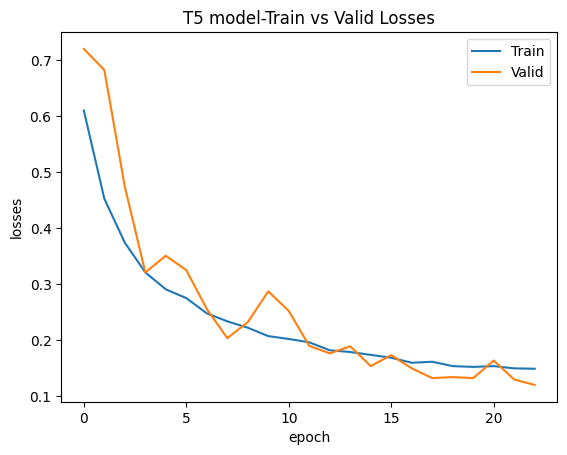

In [47]:
plt.plot(history['tr_loss'])
plt.plot(history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Losses')

plt.show()

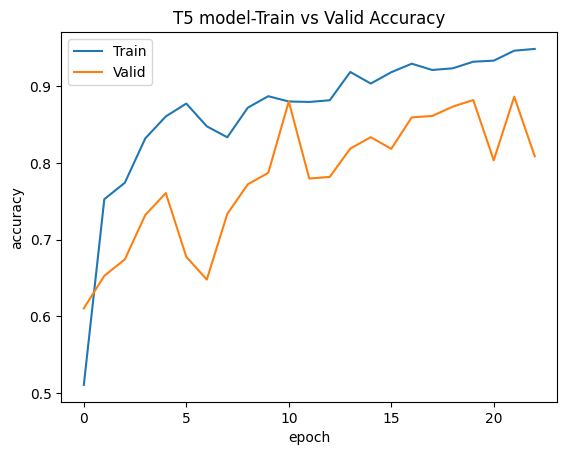

In [48]:
plt.plot(history['tr_acc'])
plt.plot(history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Accuracy')

plt.show()

In [49]:
g_model.save('t5_model/')

In [50]:
!zip 'gec_t5.zip' 't5_model/'

  adding: t5_model/ (stored 0%)
